In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Load data

In [100]:
df = pd.read_excel('vizathon-final.xlsx')

In [3]:
### preview data
df.head()

,game_id,season,day_num,date,team_id,team_name,team_city,team_state,team_dist_from_home,opp_team_id,...,opp_blks,opp_pfs,opp_poss,opp_elo_before_game,opp_elo_after_game,opp_elo_win_prob,team_off_eff,team_def_eff,opp_off_eff,opp_def_eff
0,2003_2002-12-16_1337_1350,2003,42,2002-12-16,1337,Pepperdine,Malibu,CA,,1350,...,4,24,55,709.824755,697.340523,0.520176,107.792208,100.000000,100.000000,107.792208
1,2003_2002-12-16_1337_1350,2003,42,2002-12-16,1350,Richmond,Richmond,VA,,1337,...,2,18,58,704.564412,717.048645,0.479824,100.000000,107.792208,107.792208,100.000000
2,2003_2002-12-17_1153_1332,2003,43,2002-12-17,1153,Cincinnati,Cincinnati,OH,,1332,...,1,17,53,760.028215,744.627167,0.641710,101.315789,68.421053,68.421053,101.315789
3,2003_2002-12-17_1153_1332,2003,43,2002-12-17,1332,Oregon,Eugene,OR,,1153,...,2,16,61,722.062511,737.463558,0.358290,68.421053,101.315789,101.315789,68.421053
4,2003_2002-12-17_1257_1184,2003,43,2002-12-17,1184,E Kentucky,Richmond,KY,,1257,...,6,17,57,725.007502,734.190077,0.617393,84.000000,138.666667,138.666667,84.000000


In [4]:
### look at data types and check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184940 entries, 0 to 184939
Data columns (total 57 columns):
game_id                 184940 non-null object
season                  184940 non-null int64
day_num                 184940 non-null int64
date                    184940 non-null object
team_id                 184940 non-null int64
team_name               184940 non-null object
team_city               184940 non-null object
team_state              184940 non-null object
team_dist_from_home     184940 non-null object
opp_team_id             184940 non-null int64
opp_team_name           184940 non-null object
opp_team_city           184940 non-null object
opp_team_state          184940 non-null object
opp_dist_from_home      184940 non-null object
team_win                184940 non-null int64
score_difference        184940 non-null int64
team_location           184940 non-null object
team_score              184940 non-null int64
team_fgm                184940 non-null int64
team

In [119]:
df['team_elo_before_game'].describe()

count    184940.000000
mean        704.889304
std         100.003518
min         375.693583
25%         632.638261
50%         698.986028
75%         774.366910
max        1006.036053
Name: team_elo_before_game, dtype: float64

No null values. Most data is numeric form. Some are strings (location, game-id, etc.). Some could be converted to numeric possibly, such as 'team_dist_from_home'.

Our target is going to be 'team_win'. It takes values 0 or 1.

In [5]:
df['team_win']

0         1
1         0
2         1
3         0
4         0
         ..
184935    1
184936    0
184937    1
184938    0
184939    1
Name: team_win, Length: 184940, dtype: int64

Transform date column to datetime format

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
### checking that the ELO win probabilities sum to 1
df[['team_elo_win_prob', 'opp_elo_win_prob']]

,team_elo_win_prob,opp_elo_win_prob
0,0.479824,0.520176
1,0.520176,0.479824
2,0.358290,0.641710
3,0.641710,0.358290
4,0.382607,0.617393
...,...,...
184935,0.550405,0.449595
184936,0.570711,0.429289
184937,0.429289,0.570711
184938,0.338445,0.661555


In [8]:
comb = df['team_elo_win_prob'] + df['opp_elo_win_prob']
print(comb.min())
print(comb.max())

0.9999999999999989
1.000000000000001


OK, so the sums are all very close to 1, and the two columns make sense.

How many unique teams are there?

In [9]:
n_teams = len(df.team_id.unique())
print("Number of teams: ", n_teams)

Number of teams:  360


How many matches did each team play?

count    360.000000
mean     513.722222
std       93.353138
min        1.000000
25%      514.000000
50%      538.000000
75%      557.000000
max      586.000000
Name: game_id, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x13e7fc278>,
 'caps': [<matplotlib.lines.Line2D at 0x13e48e550>,
 'boxes': [<matplotlib.lines.Line2D at 0x13e7fc128>],
 'medians': [<matplotlib.lines.Line2D at 0x13e48e080>],
 'fliers': [<matplotlib.lines.Line2D at 0x13e48e2b0>],
 'means': []}

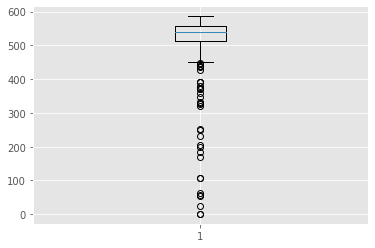

In [52]:
team_appearances = df.groupby('team_id').count().iloc[:,0]
print(team_appearances.describe())
plt.boxplot(team_appearances)

In [57]:
# how many lower outliers are there 2 std devs from the mean? 
# There are no upper outliers, since the max is less than a standard deviation from the mean

sdv = team_appearances.std()
mean = team_appearances.mean()
low_range = mean - 2*sdv

lower_outliers = team_appearances[team_appearances < low_range]

print(lower_outliers.describe())


count     17.000000
mean     150.000000
std      107.195499
min        1.000000
25%       57.000000
50%      168.000000
75%      233.000000
max      327.000000
Name: game_id, dtype: float64


17 teams who have relatively low appearances. Will that effect outcomes?

There will be less data on these teams, and greater uncertainty about their performances.

Unless it's possible to predict how a team plays based on number of appearances in Division I?

(array([  5.,   3.,   1.,   4.,   2.,   5.,   8.,   9., 103., 220.]),
 array([  1. ,  59.5, 118. , 176.5, 235. , 293.5, 352. , 410.5, 469. ,
        527.5, 586. ]),
 <a list of 10 Patch objects>)

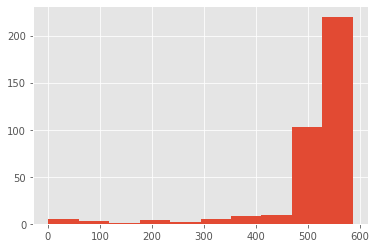

In [11]:
# another view
plt.hist(team_appearances)

How can we see a teams record at the time of a match? 
Have to access both the TeamID and the Opposing TeamID

In [12]:
wins = df.groupby('team_name').agg(sum)['team_win']
wins

team_name
 Abilene Chr             78
 Air Force              243
 Akron                  364
 Alabama                324
 Alabama A&M            151
                       ... 
 Wright St              309
 Wyoming                252
 Xavier                 401
 Yale                   270
 Youngstown St          148
Name: team_win, Length: 360, dtype: int64

In [13]:
losses = df[df['team_win'] == 0].groupby('team_name').count().iloc[:,0]
losses

team_name
 Abilene Chr            106
 Air Force              278
 Akron                  198
 Alabama                238
 Alabama A&M            340
                       ... 
 Wright St              236
 Wyoming                285
 Xavier                 175
 Yale                   228
 Youngstown St          337
Name: game_id, Length: 360, dtype: int64

In [14]:
records = pd.DataFrame({"wins": wins, "losses": losses})
records['w/l_ratio'] = records['wins'] / (records['wins'] + records['losses'])
records.head()

,wins,losses,w/l_ratio
team_name,,,
Abilene Chr,78,106,0.423913
Air Force,243,278,0.466411
Akron,364,198,0.647687
Alabama,324,238,0.576512
Alabama A&M,151,340,0.307536


Cleaning the strings

In [101]:
df = df.applymap(lambda x:  x.strip() if isinstance(x, str) else x)

In [108]:
df.team_dist_from_home[df.team_dist_from_home != '']

15962        0
15963       40
15964        0
15965     1005
15966      116
          ... 
184709     630
184710     107
184711     465
184712     204
184713       0
Name: team_dist_from_home, Length: 53196, dtype: object

In [111]:
df['team_dfh'] = df['team_dist_from_home'].apply(lambda s: int(s) if s !='' else None)

In [97]:
### turning into numeric
df['team_dist_from_home_2'] = 

In [19]:
df.date

0        2002-12-16
1        2002-12-16
2        2002-12-17
3        2002-12-17
4        2002-12-17
            ...    
184935   2002-12-15
184936   2002-12-15
184937   2002-12-15
184938   2002-12-15
184939   2002-12-15
Name: date, Length: 184940, dtype: datetime64[ns]

In [20]:
dfByDate = df.sort_values(by='date').reset_index()
dfByDate.date

0        2002-11-14
1        2002-11-14
2        2002-11-14
3        2002-11-14
4        2002-11-15
            ...    
184935   2020-03-11
184936   2020-03-11
184937   2020-03-11
184938   2020-03-11
184939   2020-03-11
Name: date, Length: 184940, dtype: datetime64[ns]

In [21]:
dfByDate.to_csv('clean_vizathon.csv')

/Users/jared/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


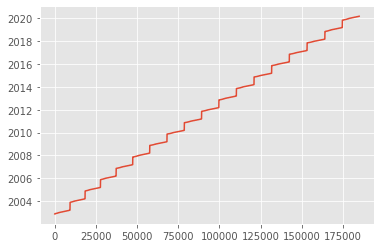

In [22]:
plt.plot(dfByDate.date)

In [23]:
dfByDate[['game_id', 'team_name', 'opp_team_name', 'team_win','team_elo_before_game', 'team_elo_after_game', 
          'team_elo_win_prob','opp_elo_before_game','opp_elo_after_game','opp_elo_win_prob' ]].tail(15)

,game_id,team_name,opp_team_name,team_win,team_elo_before_game,team_elo_after_game,team_elo_win_prob,opp_elo_before_game,opp_elo_after_game,opp_elo_win_prob
184925,2020_2020-03-11_1143_1390,California,Stanford,1,758.804377,774.464686,0.347487,799.851929,784.191620,0.652513
184926,2020_2020-03-11_1389_1233,Iona,St Peter's,0,642.471698,634.291292,0.340850,685.434774,693.615180,0.659150
184927,2020_2020-03-11_1381_1225,Idaho,Southern Utah,0,559.859998,554.686896,0.215546,644.014168,649.187269,0.784454
184928,2020_2020-03-11_1333_1428,Utah,Oregon St,0,790.247175,778.991617,0.468982,798.340247,809.595804,0.531018
184929,2020_2020-03-11_1333_1428,Oregon St,Utah,1,798.340247,809.595804,0.531018,790.247175,778.991617,0.468982
184930,2020_2020-03-11_1329_1235,Oklahoma St,Iowa St,1,865.022657,870.630300,0.766348,787.644108,782.036465,0.233652
184931,2020_2020-03-11_1329_1235,Iowa St,Oklahoma St,0,787.644108,782.036465,0.233652,865.022657,870.630300,0.766348
184932,2020_2020-03-11_1231_1304,Nebraska,Indiana,0,697.674950,695.015751,0.110800,833.343926,836.003125,0.889200
184933,2020_2020-03-11_1231_1304,Indiana,Nebraska,1,833.343926,836.003125,0.889200,697.674950,695.015751,0.110800
184934,2020_2020-03-11_1155_1274,Miami FL,Clemson,0,816.444562,805.327466,0.463212,826.047930,837.165025,0.536788


In [24]:
dfByDate[dfByDate['game_id'] == '2020_2020-03-11_1155_1274']

,index,game_id,season,day_num,date,team_id,team_name,team_city,team_state,team_dist_from_home,...,opp_blks,opp_pfs,opp_poss,opp_elo_before_game,opp_elo_after_game,opp_elo_win_prob,team_off_eff,team_def_eff,opp_off_eff,opp_def_eff
184885,68788,2020_2020-03-11_1155_1274,2020,128,2020-03-11,1155,Clemson,Clemson,SC,197,...,3,16,68,816.444562,805.327466,0.463212,84.146341,78.048780,78.048780,84.146341
184934,68789,2020_2020-03-11_1155_1274,2020,128,2020-03-11,1274,Miami FL,Coral Gables,FL,714,...,1,10,52,826.047930,837.165025,0.536788,78.048780,84.146341,84.146341,78.048780


In [25]:
dfByDate.groupby('game_id').count()['index'].unique()

array([2])

In [26]:
dfByDate['team_elo_win_prob'].apply(lambda x: round(x))

0         0
1         0
2         0
3         0
4         0
         ..
184935    1
184936    0
184937    1
184938    1
184939    1
Name: team_elo_win_prob, Length: 184940, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [48]:
def accuracy_threshold(df, thresh, range_=0.5):
    df_above = df[(df['team_elo_win_prob'] >= thresh) & (df['team_elo_win_prob'] <= thresh + range_)]
    y_true = df_above['team_win']
    y_pred = df_above['team_elo_win_prob'].apply(lambda x: round(x))
    return accuracy_score(y_true, y_pred)

In [49]:
accuracy_threshold(dfByDate, 0.5) * 100

69.86379727162839

/Users/jared/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/jared/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Accuracy of Elo predictions')

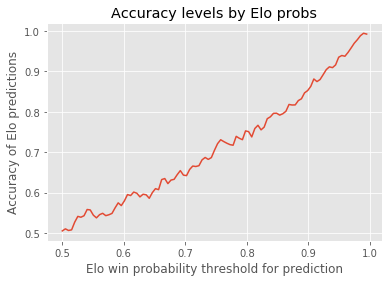

In [30]:
fig, ax = plt.subplots()

x = np.linspace(0.5, 1, 100)
y = [accuracy_threshold(dfByDate, t, 0.01) for t in x]

ax.plot(x, y)
ax.set_title('Accuracy levels by Elo probs')
ax.set_xlabel('Elo win probability threshold for prediction')
ax.set_ylabel('Accuracy of Elo predictions')

In [31]:
dfByDate[dfByDate['team_name'] == 'Alabama']['team_elo_after_game'].iloc[-1]

801.734237478308

In [32]:
def most_recent_elo(team_name):
    return dfByDate[dfByDate['team_name'] == team_name]['team_elo_after_game'].iloc[-1]

def calc_elo_win_prob(team_name, opp_name):
    team_elo = most_recent_elo(team_name)
    opp_elo = most_recent_elo(opp_name)
    
    E = 1 / ( 1  +  10 ** ((opp_elo - team_elo)/400) )
    return E


In [33]:
calc_elo_win_prob('Alabama', 'Alabama A&M')

0.8607104987074217

In [34]:
records = records.reset_index()
records

,team_name,wins,losses,w/l_ratio
0,Abilene Chr,78,106,0.423913
1,Air Force,243,278,0.466411
2,Akron,364,198,0.647687
3,Alabama,324,238,0.576512
4,Alabama A&M,151,340,0.307536
...,...,...,...,...
355,Wright St,309,236,0.566972
356,Wyoming,252,285,0.469274
357,Xavier,401,175,0.696181
358,Yale,270,228,0.542169


In [35]:
records['team_name'] = records['team_name'].apply(lambda x: x.strip())

In [36]:
records['most_recent_elo'] = records['team_name'].apply(most_recent_elo)

In [37]:
team_names_grouped = dfByDate.groupby('team_name').agg(max)

In [38]:
records = records.merge(team_names_grouped[['team_city', 'team_state', 'team_id']], how='inner', on='team_name')

In [39]:
records.to_csv('records.csv')

In [40]:
records = pd.read_csv('records.csv', index_col=0)

In [41]:
names = records['team_name']
max_ = 0
long = ''
for c in names:
    s = c.strip()
    if len(s) >= max_ and s != 'Eastern New Mexico':
        max_ = len(s)
        long = s
print(max_)
print(long)

16
Northern Arizona


In [42]:
# preds = pd.DataFrame(columns=['team_name', 'opp_name', 'team_win_prob', 'opp_win_prob'])

E = lambda team_elo, opp_elo: 1 / ( 1  +  10 ** ((opp_elo - team_elo)/400) )

team_name = []
opp_name = []
team_win_prob = []
# opp_win_prob = []

for ti, team_elo in enumerate(records.most_recent_elo):
    team_name.append(records['team_name'][ti])
    matchups = []
    for oi, opp_elo in enumerate(records.most_recent_elo):
        opp_name.append(records['team_name'][oi])
        t_win_prob = E(team_elo, opp_elo)
#         o_win_prob = 1 - t_win_prob
        matchups.append(t_win_prob)
#         opp_win_prob.append(o_win_prob)
    team_win_prob.append(matchups)

In [43]:
preds = pd.DataFrame(columns=records['team_name'], data=np.array(team_win_prob))
preds.insert(0, 'Team ID', records['team_id'])
preds.insert(1, 'Team Name', team_name)
preds.head(10)

team_name,Team ID,Team Name,Abilene Chr,Air Force,Akron,Alabama,Alabama A&M,Alabama St,Albany NY,Alcorn St,...,Wichita St,William & Mary,Winthrop,Wisconsin,Wofford,Wright St,Wyoming,Xavier,Yale,Youngstown St
0,1101,Abilene Chr,0.500000,0.527166,0.351974,0.341481,0.762150,0.743848,0.631186,0.690027,...,0.286993,0.450546,0.485123,0.219955,0.453363,0.428816,0.532326,0.300940,0.371634,0.581424
1,1102,Air Force,0.472834,0.500000,0.327581,0.317459,0.741874,0.722580,0.605525,0.666295,...,0.265260,0.423790,0.458025,0.201862,0.426569,0.402405,0.505179,0.278564,0.346607,0.554743
2,1103,Akron,0.648026,0.672419,0.500000,0.488420,0.855063,0.842433,0.759088,0.803864,...,0.425641,0.601546,0.634333,0.341739,0.604269,0.580224,0.676965,0.442148,0.521277,0.718897
3,1104,Alabama,0.658519,0.682541,0.511580,0.500000,0.860710,0.848485,0.767458,0.811066,...,0.437004,0.612597,0.645010,0.352236,0.615292,0.591464,0.687013,0.453604,0.532825,0.728164
4,1105,Alabama A&M,0.237850,0.258126,0.144937,0.139290,0.500000,0.475411,0.348148,0.409930,...,0.111597,0.203759,0.227229,0.080882,0.205610,0.189820,0.262113,0.118436,0.155813,0.302404
5,1106,Alabama St,0.256152,0.277420,0.157567,0.151515,0.524589,0.500000,0.370807,0.433933,...,0.121735,0.220195,0.244975,0.088508,0.222154,0.205421,0.281592,0.129105,0.169204,0.323563
6,1107,Albany NY,0.368814,0.394475,0.240912,0.232542,0.651852,0.629193,0.500000,0.565358,...,0.190411,0.323929,0.355068,0.141458,0.326425,0.304917,0.399434,0.200988,0.256827,0.448017
7,1108,Alcorn St,0.309973,0.333705,0.196136,0.188934,0.590070,0.566067,0.434642,0.500000,...,0.153128,0.269195,0.297387,0.112428,0.271438,0.252197,0.338327,0.162048,0.209911,0.384232
8,1110,American Univ,0.462900,0.490026,0.318853,0.308877,0.734159,0.714511,0.595955,0.657365,...,0.257557,0.414077,0.448138,0.195510,0.416839,0.392849,0.495204,0.270617,0.337627,0.544867
9,1111,Appalachian St,0.500447,0.527612,0.352382,0.341883,0.762474,0.744189,0.631603,0.690410,...,0.287359,0.450989,0.485570,0.220262,0.453807,0.429255,0.532772,0.301317,0.372052,0.581860


In [44]:
preds.to_csv('preds_by_elo.csv')

#### Team Dist from home

In [45]:
dfByDate['team_dist_from_home'].unique()

array(['                     ', 461, 0, ..., 1268, 5150, 1705],
      dtype=object)

### Feature selection / Engineering

Some features are obviously not going to be available for new games. You will just have team names, their prior history, and possibly location data about the game.

Things to implement:

   - New column which makes prediction based on who has higher elo. Then compare to actual result.

   - Running totals/averages for games (rolling windows for date ranges/seasons)

#### Correlation

In [121]:
df['team_fg_percent'] = df['team_fgm'] / df['team_fga']
df['opp_fg_percent'] = df['opp_fgm'] / df['opp_fga']

df['team_3p_percent'] = df['team_3pm'] / df['team_3pa']
df['opp_3p_percent'] = df['opp_3pm'] / df['opp_3pa']


df['team_ft_percent'] = df['team_ftm'] / df['team_fta']
df['opp_ft_percent'] = df['opp_ftm'] / df['opp_fta']


In [122]:
correlations = df.corrwith(df['team_win'], method='spearman').sort_values().drop('team_win')

In [124]:
print("Top 5 factors in increasing win probability:")
print(correlations[::-1][:10], '\n')
print("Top 5 factors in decreasing win probability:")
print(correlations[:10])

Top 5 factors in increasing win probability:
opp_def_eff            0.512642
team_off_eff           0.512642
team_fg_percent        0.492700
team_score             0.488390
team_elo_win_prob      0.476743
team_def_rebs          0.395244
team_asts              0.372791
team_fgm               0.360709
team_elo_after_game    0.338183
team_3p_percent        0.317057
dtype: float64 

Top 5 factors in decreasing win probability:
opp_off_eff          -0.512642
team_def_eff         -0.512642
opp_fg_percent       -0.492700
opp_score            -0.488390
opp_elo_win_prob     -0.476743
opp_def_rebs         -0.395244
opp_asts             -0.372791
opp_fgm              -0.360709
opp_elo_after_game   -0.338183
opp_3p_percent       -0.317057
dtype: float64


In [114]:
correlations

opp_off_eff            -0.512642
team_def_eff           -0.512642
opp_score              -0.488390
opp_elo_win_prob       -0.476743
opp_def_rebs           -0.395244
opp_asts               -0.372791
opp_fgm                -0.360709
opp_elo_after_game     -0.338183
opp_ftm                -0.313585
opp_fta                -0.283804
team_pfs               -0.252684
opp_elo_before_game    -0.250446
team_dfh               -0.245216
opp_blks               -0.200299
opp_3pm                -0.174587
opp_stls               -0.158827
team_tos               -0.148883
team_3pa               -0.078759
team_fga               -0.078490
opp_team_id            -0.026049
team_off_rebs          -0.024091
season                  0.000000
day_num                 0.000000
score_difference        0.000000
opp_poss                0.011140
opp_off_rebs            0.024091
team_id                 0.026049
opp_fga                 0.078490
opp_3pa                 0.078759
team_poss               0.141219
opp_tos   